# Assignment 3 : Train a Neural Network 

### Goals

Apply plain vanilla gradient descent to a relatively simple neural network. 
The network can be used to train a binary classification task such as distinguishing whether a cat is seen on a given image. 

For the implementation, a cost function is defined (on the training dataset) and the gradient w.r.t. the parameters of the model needs to be calculated. 

The network will be a fully connected neural network (multi-layer perceptron, MLP) with a single hidden layer. The implementation should be capable of dealing with differently shaped input datasets (input size of flattened image $n_0$) and number of units in the hidden layer ($n_1$). This will allow to apply your implementation to two different datasets, MNIST and a dataset with/without cats. 

**Overview**

| Problem | Content | Bonus Points |
| :--- | :--- | :---: |
| Problem 1 | Derive Formulas | -2 to 0 |
| Problem 2 | Implement Model and Cost Function and its Gradients | 0 to 2 |
| Problem 3 | Implement Gradient Descent Training | 0 to 1 |
| Problem 4 | Apply GD to MNIST | 0 to 1 |
| Problem 5 | Apply GD to Cats/NoCats | 0 to 1 |

Please send your solution per mail to [Martin Melchior](mailto:martin.melchior@fhnw.ch).


## Introductionary Remarks: Imports, Plotting

Implement the model as described below with <code>Numpy</code>. 
For plotting use <code>Matplotlib</code>. 

Hence, you will only need the following imports:


In [147]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

For tracking progress of the optimization, you will plot the cost as a function of the iteration (or "epoch"). For this purpose, you can use the method <code>learningcurve_plots</code>. 

In [148]:
def learningcurve_plots(cost_hist, learning_speed_hist, logy=False):
    """
    cost_hist -- history of cost values, as numpy-array of shape (T,1)
    learning_speed_hist -- history of learning speed values, as numpy-array of shape (T,1)
    logy -- if set to True will plot the y axis at logarithmic scale
    """
    plt.figure(1)
    T = len(cost_hist)
    if logy:
        plt.semilogy(np.arange(T),cost_hist,'b-')
    else:
        plt.plot(np.arange(T),cost_hist,'b-')
    plt.title("Cost")
        
    plt.figure(2)
    T = len(learning_speed_hist)
    if logy:
        plt.semilogy(np.arange(T),learning_speed_hist,'g-')
    else:
        plt.plot(np.arange(T),learning_speed_hist,'g-')
    plt.title("Learning Speed")

## Problem 1 : Derive Formulas for Model and Cost Function and Gradient

### Problem 1a): Model Function and Gradient

Here, you should mathematically describe the model function and its gradient. 
Actually, I will give you the structure of the model, you will then write down the components of the gradients.

As described above, the model contains a single hidden layer with $n^{(h)}$ units and a single input is given by an array of length $n^{(in)}$.
To compute the output from the input $x^{(in)}$, the following formulas hold:

$a^{(h)} = \sigma\left(W^{(h)}\cdot x^{(in)} + b^{(h)}\right)$<br>
$a^{(out)} = \sigma\left(W^{(out)}\cdot a^{(h)} + b^{(out)}\right)$

where 
* $W^{(h)}$ is a $n^{(h)}\times n^{(in)}$-matrix, 
* $b^{(h)}$ is a $n^{(h)}\times 1$-matrix, 
* $W^{(out)}$ is a $1\times n^{(h)}$-matrix, 
* $b^{(out)}$ is a scalar 

and $\sigma(z)=\frac{1}{1+\exp(-z)}$ is the sigmoid function which is applied element-wise if the input is a vector or matrix. The output of the model $a^{(out)}$ is a scalar. Note that the model output is a function of the input $x$ and the model parameters summarized as $\theta$, i.e. 

$$a^{(out)}=y^{(pred)}(x^{(in)},\theta)$$

Derive the formulas for the partial derivatives with respect to the components of the parameters $\theta$, i.e. of the components of $W^{(h)}, b^{(h)}, W^{(out)}, b^{(out)}$.
Define a scheme that makes efficient use of intermediate results, i.e. make manifest the terms that can be re-used for computing the parameters of the output and the hidden layer as well as the terms that can be reused to compute the weights and the bias for the output or the hidden layer. 


## Result


#### Formula

Given the definitions

$a^{(h)} = \sigma\left(W^{(h)}\cdot x^{(in)} + b^{(h)}\right)$<br>
$a^{(out)} = \sigma\left(W^{(out)}\cdot a^{(h)} + b^{(out)}\right)$

it follows that

$a^{(out)} = \sigma\left(W^{(out)}\cdot \sigma\left(W^{(h)}\cdot x^{(in)} + b^{(h)}\right) + b^{(out)}\right)$


#### Gradient

$\begin{pmatrix}
\frac{\delta L}{\delta W^{(h)}} & \frac{\delta L}{\delta W^{(out)}} \\
\frac{\delta L}{\delta b^{(h)}} & \frac{\delta L}{\delta b^{(out)}} 
\end{pmatrix}$

---

Derrivates with respect to the last layer: 

$\frac{\delta L}{\delta W^{(out)}} = \frac{\delta L}{\delta x^{(out)}} * \frac{\delta x^{(out)}}{\delta W^{(out)}}$

$\frac{\delta L}{\delta b^{(out)}} = \frac{\delta L}{\delta x^{(out)}} * \frac{\delta x^{(out)}}{\delta b^{(out)}}$

---

Reuse calculations in earlier layers 

$\frac{\delta L}{\delta x^{(h)}} = \frac{\delta L}{\delta x^{(out)}} * \frac{\delta x^{(out)}}{\delta x^{(h)}}$

$\frac{\delta L}{\delta W^{(h)}} =  \sum \frac{\delta L}{\delta x^{(h)}} * \frac{\delta x^{(h)}}{\delta W^{(h)}} = \frac{\delta L}{\delta x^{(out)}} * \sum \frac{\delta x^{(out)}}{\delta x^{(h)}} * \frac{\delta x^{(h)}}{\delta W^{(h)}}$

$\frac{\delta L}{\delta b^{(h)}} = \frac{\delta L}{\delta x^{(out)}} * \sum  \frac{\delta x^{(out)}}{\delta x^{(h)}} * \frac{\delta x^{(h)}}{\delta b^{(h)}}$

---

Resolve: 

$\frac{\delta L}{\delta x^{(out)}} = \frac{\hat {y} - y}{\hat {y} ( 1 - \hat {y} )} $

$\frac{\delta x^{(out)}}{\delta W^{(out)}} = \sigma' ( W^{(out)} * x^{(h)} + b^{(out)} ) * x^{(out)} $

$\frac{\delta x^{(out)}}{\delta x^{(h)}} = \sigma' ( W^{(out)} * x^{(h)} + b^{(out)} ) * W^{(out)} $

### Probem 1b): Cost Function and Derivatives

As cost function, we use the binary cross-entropy loss applied to the model prediction $y^{(pred)}=a^{(out)}$ defined to be

$$L(y^{(pred)}, y) = -y\log(y^{(pred)})-(1-y)\log(1-y^{(pred)})$$

Here, $y$ denotes the binary label associated with the input, i.e. $y\in\{0,1\}$ (e.g. '0' - image contains not cat | '1' - image contains cat). For a given input $x^{(in)}=x$ we use the model with parameters $\theta$ to predict the output $a^{(out)}=y^{(pred)}(x,\theta)$ and then compute the loss according to the formula above. 

The cost function is defined as the loss function averaged over all the dataset, i.e.

$$C(\theta) = \frac{1}{N}\sum_{i=1}^N\,L\left(y^{(pred)}(x^{(i)},\theta), y^{(i)}\right)$$

We now use gradient descent to determine the parameters at which the cost function becomes minimal.

When computing the gradient of this cost w.r.t. model parameters, you need to compute the derivative of the cross entropy loss function, $L$ w.r.t. $y^{(pred)}$  and apply the chain rule.

Derive the formula for the derivative of $L$ w.r.t. $y^{(pred)}$.

## Result

$\frac{\delta L}{\delta \hat {y} } = (\hat { y } log(\hat {y} ) - (1 - y) log(1 - \hat {y})) = \frac{1 - y}{1 - \hat{y}} - \frac{y}{\hat{y}} = -\frac{\hat{y} - y}{(\hat{y} - 1) \hat{y}}$ 



## Problem 2 : Implement Model and Cost Function and its Gradient

Here, you translate the formulas of problem 1 into code. 

### Problem 2a): Model

For convenience, we define the model as a python class which allows to keep the parameters and intermediate results (such as $a^{(h)}$) as member variables.

The class should have (at least) the following instance methods:
* $forwardprop(x)$ : Compute the model output when passing an input $x$ through the model. Implement it such that you can handle multiple inputs at the same time, i.e. assume $x$ is a numpy array of shape $(n^{(in)},N)$ where $N$ is the number of inputs.
* $backwardprop(\dots)$ : Compute the gradient with respect to the model parameters. 
* $initialize(\dots)$ : Set initial values for the model parameters.
* $update\_params(\dots)$: Update the model parameters in accordance with the gradient descent update rule.

Make efficient use of the scheme derived in problem 1 by keeping intermediate results as member variables. Assume that $backwardprop$ is called after $forwardprop$ has been invoked. Introduce suitable member variables for the intermediate variables needed for the computation of the gradients. Furthermore, introduce member variables for the parameters (weights, bias) and their gradients.  

Assume the following shapes for the quantities involved ($n^{(in)}=n0, n^{(h)}=n1$):
* $W^{(h)}$ : 2d numpy array of shape (n1,n0)
* $b^{(h)}$ : 1d numpy array of shape (n1,1)
* $W^{(out)}$ : 1d numpy array of shape (1,n1)
* $b^{(out)}$ : scalar quantity 
* $x^{(in)}$ : 2d numpy array of shape (n0,N)
* $a^{(out)}$ : 2d numpy array of shape (1,N)

For the gradients, there will be a contribution for each input which needs to be properly averaged. The resulting gradient should have the same dimension as the parameter arrays. The input to the $backwardprop$ function is fed by the derivative of the loss function (evaluated element-wise per sample. This will allow to compute gradients with respect to the parameters properly averaged over all the samples. 


In [149]:
def deriv_sigmoid (x):
    sig = 1/(1+np.exp(-x)) # Sigmoid
    return sig * (1 - sig)

def sigmoid(num):
    return 1/(1+np.exp(-num))


class Model:

    def __init__(self, ninput, nhidden):
        """
        Constructor of the model designed for given input dimension and number of units in hidden layer.
        
        Arguments:
        ninput - size of input
        nhidden - size of hidden layer
        """
        self.ninput = ninput
        self.nhidden = nhidden
        
    def initialize(self, initial_weights_hidden, initial_weights_output):
        """
        Initialize the weights of the model with given input arguments and reset the biases to zero values. 
        
        Arguments:
        initial_weights_hidden - initial weights of the hidden layer (must be of shape (nhidden, ninput))
        initial_weights_output - initial weights of output layer (must be of shape (1, nhidden))
        """
        # START YOUR CODE

        self.weights_hidden = initial_weights_hidden
        self.bias_hidden = 0
        self.weights_out = initial_weights_output
        self.bias_out = 0
        
        # END YOUR CODE
        
    def forwardprop(self, x):
        """
        Computes the forward path through the model. Keeps as state variables the inputs and the activations of the hidden layer and the output layer 
        (as numpy arrays of shape (n0,N), (n1,N), (1,N)). The activations of the layer are finally returned from the method call.
        
        Arguments:
        x - shape (n0, N)
        
        Returns:
        output of the model, numpy array of shape (1,N)
        """
        # START YOUR CODE
        self.x = x
        self.activation_hidden = sigmoid(np.dot(self.weights_hidden, x) + self.bias_hidden)
        self.activation_out = sigmoid(np.dot(self.weights_out, self.activation_hidden) +  self.bias_out)
        return self.activation_out
        # END YOUR CODE
        
    def backwardprop(self, deriv_loss):
        """
        The computation is done after running the forwardprop.
        
        Arguments:
        deriv_loss - the gradient of the loss w.r.t. output of the model, a numpy array of shape (1,N)
        
        Returns:
        None
        
        """
        # START YOUR CODE
        deltaOut = deriv_loss * deriv_sigmoid(self.weights_out.dot(self.activation_hidden) + self.bias_out)
        deltaH = self.weights_out.T.dot(deltaOut) * deriv_sigmoid(self.weights_hidden.dot(self.x) + self.bias_hidden)
        self.bias_hidden_grad = deltaH
        self.weights_hidden_grad = deltaH.dot(self.x.T)
        self.bias_out_grad = deltaOut
        self.weights_out_grad = deltaOut.dot(self.activation_hidden.T)
        # END YOUR CODE
        
        
    def update_params(self, lr):
        """
        Updates the parameters of the model according to gradient descent. It is assumed that the weights are properly initialized and the gradients
        previously computed.
        
        Arguments:
        lr - learning rate
        
        Returns:
        None
        
        """
        # START YOUR CODE

        # Update weights and biases with the calculated gradient times the learning rate
        self.weights_hidden = self.weights_hidden + self.weights_hidden_grad * lr
        self.bias_hidden = self.bias_hidden + np.average(self.bias_hidden_grad * lr)
        self.weights_out = self.weights_out + self.weights_out_grad * lr
        self.bias_out = self.bias_out + np.average(self.bias_out_grad * lr)
        
        # END YOUR CODE

### Problem 2b): Cost, Loss 

Similarly, we define a class for the Cross-Entropy loss function. While the loss has been defined in 1b), the **cost** just takes the average over all data points in the dataset used for training.

Implement for the cross-entropy class the instance methods 
* $cost(...)$
* $derivative\_loss(...)$

as described below. Note that these are evaluated for given numpy arrays $ypred$ and $ytrue$ with the model prediction $a^{(out)}$ and the true label $y$, each of shape $(1,N)$. 

In [150]:
class CrossEntropy:

    def cost(self, ypred, ytrue):
        """
        Computes the average binary cross entropy cost for given arrays ytrue and ypred, with the ground truth label values (in {0,1}) 
        and the predicted proabability to observe label 1, respectively.

        Arguments:
        ypred - numpy array of shape (1,N) with the predicted values for N data points
        ytrue - numpy array of shape (1,N) with the ground truth values for N data points

        Returns:
        Cost averaged over the samples, i.e. a scalar value.
        """
        # START YOUR CODE
        cost = 0
        for (p, e) in zip(ypred[0], ytrue[0]):
            cost += -e * np.log(p) - (1 - e) * np.log(1 - p)
        return cost / len(ypred[0])
        # END YOUR CODE

    
    def derivative_loss(self, ypred, ytrue):
        """
        Computes the derivative of the cross entropy loss function for given true label y and predicted ypred. 
        We expect numpy arrays to be passed as input arguments, so that the derivative should be computed element-wise. 

        Arguments:
        ypred - numpy array of shape (1,N) with the predicted values for N data points
        ytrue - numpy array of shape (1,N) with the ground truth values for N data points

        Returns:
        Element-wise derivative of the loss function (numpy array of shape (1,N))
        """    
        # START YOUR CODE
        return -(ypred - ytrue) / (ypred * (1 - ypred))
        # END YOUR CODE

## Problem 3: Implement the Gradient Descent Training (GD)

Implement the gradient descent update loop for a given instance of the model and cost.

In order to monitor the update of the training, keep book at each iteration about 
* value of the cost (at the given parameters)
* learning speed (~length of the gradient) 

In [151]:
def vanilla_gradient_descent(model, cost, weights_hidden, weights_output, data, lr, epochs, eps = 1e4):
    """
    Performs plain vanilla gradient descent for the cost function. The variables x of the function are provided as np-arrays.
    
    Arguments:
    model -- model
    cost -- cost function object
    weights_hidden -- weights in the hidden layer
    weights_output -- weights in the output layer
    lr -- learning rate
    epochs -- maximum number of iterations
    data -- dataset as dictionary with the input data (key: "input" | value: numpy array of shape (n0,N)) and label data (key: "label" | numpy array of shape (1,N)) 
    
    Returns:
    cost_hist -- history of the values of the cost function seen during the iteration loop: np-array of shape (T,1) where T is the number of iteration needed.
    learning_speed_hist -- history of the learning speed where the learning speed given by the norm of the difference between subsequent x-values: np-array of shape (T,1) where T is the number of iteration needed.
    """
    # START YOUR CODE

    # Setup Model
    model.initialize(weights_hidden, weights_output)

    # Setup History Arrays
    cost_hist = np.array([])
    learning_speed_hist = np.array([])
    

    # Setup input and expected data
    x = data['input']
    expected = data['labels']

    # Do first iteration outside of loop to setup cost history
    o = model.forwardprop(x)
    cost_hist = np.append(cost_hist, [cost.cost(o, expected)])

    loss = cost.derivative_loss(o, expected)
    model.backwardprop(loss)
    model.update_params(lr)

    # Learn for epoch iterations
    for i in range(epochs):
        o = model.forwardprop(x)
        cost_hist = np.append(cost_hist, [cost.cost(o, expected)])
        loss = cost.derivative_loss(o, expected)
        model.backwardprop(loss)
        model.update_params(lr)
        ls = cost_hist[-2] - cost_hist[-1]
        learning_speed_hist = np.append(learning_speed_hist, [ls])
        
        if (ls == 0):
            break

    return cost_hist, learning_speed_hist
    # END YOUR CODE

The following helper function will be useful to initialize the weights arrays - that will be passed to the $initialize$-method of the <code>Model</code> class.  

In [152]:
def initial_weights(n0, n1):
    """
    Prepares a random 2d numpy array of shape (n0,n1) suited as initial weights for the training of the neural network model.
    """
    weights_hidden = np.random.normal(size=(n1,n0), loc=0.0, scale=1.0/np.sqrt(n1*n0))
    weights_output = np.random.normal(size=(1,n1), loc=0.0, scale=1.0/np.sqrt(n1))
    return (weights_hidden, weights_output)

## MNIST Dataset

We here want to train a classifier for the MNIST dataset that is often used in machine learning. The images are digitized, hand-written figures. Actually, we use a light-weight version which consists of only 1797 images with 8x8 pixels. The vectors contained in $X$ are 64-dim vectors (8x8=64) - its elements correspond to the gray-scale values of the pixels (normalized to be included in [0,1]). 

The label values are set to '1' (`true`) if the hand-written figure is a '1' and '0' (`false`) in all the other cases. 

In [153]:
# Please make sure that the data file is included in the same folder as the given jupyter notebook. 
data = np.load( "./vana_data.npz" )
X = data['X'].T[1:,:]
y = data['y'].T.reshape(1,X.shape[1])
print(X.shape,y.shape)

(64, 1797) (1, 1797)


Now, you can access the samples of the daatset by accessing the columns of $X$. In numpy: `x_i = X[:,i]`. 
If you reshape it to 8x8 you can eventually recognize the digit depicted on the image (a '0' in the example below):

In [154]:
X[:,0].reshape(8,8)

array([[0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ],
       [0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ],
       [0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ],
       [0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ],
       [0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ],
       [0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ],
       [0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ]])

The 2d arrays can be plotted as image by applying the following code snippets: 

Text(0.5, 1.0, 'Label: 0')

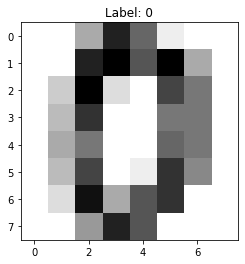

In [155]:
item = 0
plt.imshow( X[:,item].reshape(8,8), cmap="binary" )
plt.title( "Label: " + str( y[0,item] )) 

The following should rather be a '1' (since the label is '1'):

Text(0.5, 1.0, 'Label: 1')

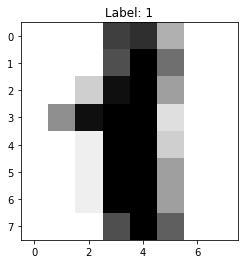

In [156]:
item = 1
plt.imshow( X[:,item].reshape(8,8), cmap="binary" )
plt.title( "Label: " + str( y[0,item] )) 

## Problem 4: Apply GD to MNIST

We here ignore ML specific aspects such as using a part of the data for validation and test or dealing with class-imbalance. We rather just want to see whether the optimization works.  

(1) Apply the functionality implemented above to train MNIST. Use the <code>learningcurve_plots</code> to visualize whether gradient descent was performing well over the iterations. Also compute the final error rate, i.e. the percentage of wrong predictions. The predicted label can be obtained from $y^{(pred)}(\theta,x)$ by just rounding it to 0 or 1.

(2) Compare and characterize the shape of the learning for different learning rates. What's the "best" learning rate (<code>lr</code>). How many iterations (<code>epochs</code> should be set?

Learning Rate: 0.01000
Epochs: 1000.00000
error rate: 0%


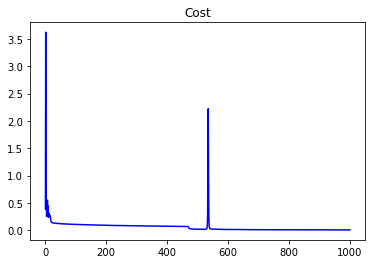

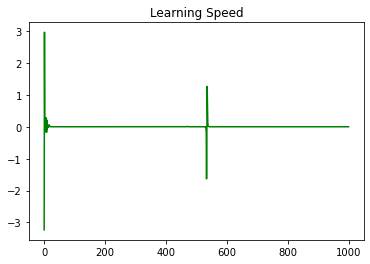

In [157]:
n0 = X.shape[0]
n1 = 50

lr = 0.01
epochs = 1000
print("Learning Rate: %6.5f"%lr)
print("Epochs: %6.5f"%epochs)

# START YOUR CODE


def learn(n0, n1, lr, epochs):

    w_h, w_out = initial_weights(n0, n1)

    ce = CrossEntropy()
    model = Model(n0, n1)

    data = { 
        "input": X, 
        "labels": y 
    }
    
    c, ls = vanilla_gradient_descent(model, ce, w_h, w_out, data, lr, epochs)
    learningcurve_plots(c, ls)


    o = model.forwardprop(X)

    correct = 0
    error = 0
    for i in range(len(y[0])):
        if round(o[0,i]) == y[0,i]:
            correct += 1
        else:
            error += 1

    print ("error rate: %i%%"%((error/y[0].__len__())*100))
    
    
learn(n0, n1, lr, epochs)
    
# END YOUR CODE

The run with learning rate 0.01 and epochs 1000 shows that 0.01 is to large a learning rate. This is evident by the initial peak. We test the next iteration with the larning rate reduced by a factor of 10. The epoch for this iteration will be reduced 200, as we see that the cost stagnates before reaching 200. 

error rate: 1%


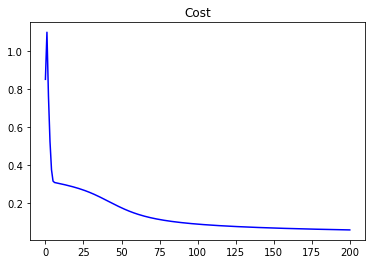

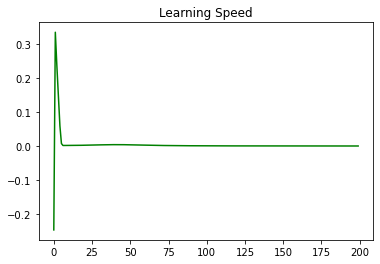

In [158]:
lr = 0.001
epochs = 200
learn(n0, n1, lr, epochs)

The run with learning rate 0.001 and epochs 20 shows that 0.001 still is to large a learning rate. We do see the same  peak at the beginning. We again reduce the learning rate by a factor of 10. As the cost graph does not clearly stagnate before 200 we will increase the learning rate two fold to 400. 

error rate: 5%


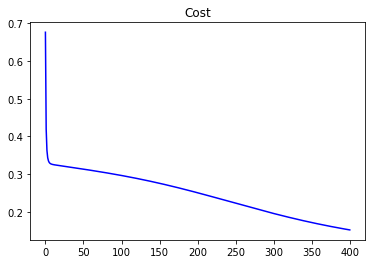

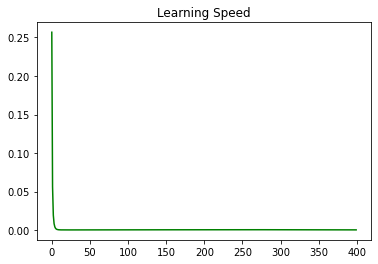

In [159]:
lr = 0.0001
epochs = 400
learn(n0, n1, lr, epochs)

This looks a lot better. However the error rate is much to high at 8%. We test with an increased learning rate of 0,0005 end a few more epochs at 500.

error rate: 1%


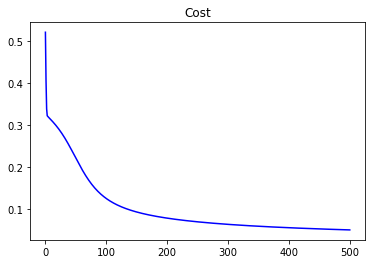

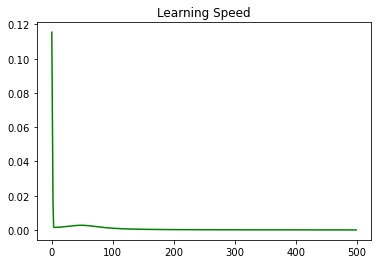

In [160]:
lr = 0.0005
epochs = 500
learn(n0, n1, lr, epochs)

Finally we have find near optimal parameters at learning rate 0,0005 and epochs 500.

# Cat/NoCat Images

You now can apply the approach(es) implemented above to the cat/nocat use case - alternatively, you can pick another suitable use case. 

For loading the cat/nocat dataset run the following lines of code. 

In [161]:
cat_nocat_data = np.load("./cat_nocat_data.npz") # point to the suitable folder relative to the folder of the notebook
X_train = cat_nocat_data['X_train'].T
X_test = cat_nocat_data['X_test'].T
y_train = cat_nocat_data['y_train'].T.reshape(1,X_train.shape[1])
y_test = cat_nocat_data['y_test'].T.reshape(1,X_test.shape[1])
[X_train.shape, y_train.shape, X_test.shape, y_test.shape]

[(12288, 209), (1, 209), (12288, 50), (1, 50)]

With the following function you can plot a few sample images:

In [ ]:
def plot_image( X, y ):
    plt.imshow( X.reshape(64,64,3) )
    title = 'cat' if y==1 else 'non-cat'
    plt.title( title )

plt.figure(figsize=(20,20))
for i in range(10):
    for j in range(10):
        plt.subplot2grid((10,10),(i,j))
        plot_image( X_train[:,10*i+j], y_train[0,10*i+j] )
plt.tight_layout()

Actually, we have loaded 
* a training set (with 209 samples) that can be used to train the model, i.e. optimize the model parameters
* a test set (with 50 samples) that can be used to test the performance of the trained model.

The images are flattened arrays of size $64\times 64\times 3=12288$, i.e. quite large arrays.

## Problem 5 : Apply GD to Cat/NoCat Dataset

Apply Gradient Descent to train a classifier that can distinguish images with or without cats. 

(1) Apply the functionality implemented above to optimize the cost functio defined with `X_train` und `y_train`. Again, use the <code>learningcurve_plots</code> to visualize whether gradient descent was performing well over the iterations. The training will take more time than for MNIST. So, at beginning use at max 1000 Iterationen.

(2) Use the trained model to make predictions for the test data (not used for training). Determine the percentage of correct predictions for the train and test dataset. As label predicted by the model you can use (for simplicity) $y^{(pred)}(\theta, x)$ round to 0 or 1. 

(3) What is a reasonable number of iterations (epochs) to be chosen?

(4) Explore the images for which the model gives a wrong prediction.

In [ ]:
n0 = X_train.shape[0]
n1 = 50

lr = 0.001
epochs = 1000
print("Learning Rate: %6.5f"%lr)
print("Epochs: %6.5f"%epochs)


# START YOUR CODE
w_h, w_out = initial_weights(n0, n1)

ce = CrossEntropy()
model = Model(n0, n1)

data = { 
    "input": X_train, 
    "labels": y_train 
}

c, ls = vanilla_gradient_descent(model, ce, w_h, w_out, data, lr, epochs)
learningcurve_plots(c, ls)

# END YOUR CODE


In [ ]:
## YOUR FINDINGS on (3) SHOULD BE POSTED HERE
##

o = model.forwardprop(X_test)

correct = 0
error = 0
wrong_images = []
for i in range(len(y_test[0])):
    if round(o[0,i]) == y_test[0,i]:
        correct += 1
    else:
        error += 1
        wrong_images.append((i, o[0, i]))

print ("error rate: %i%%"%((error/len(y_test[0]))*100))

In [ ]:
## YOUR FINDINGS on (4) SHOULD BE POSTED HERE
##

print('Wrong data: ')

plt.figure(figsize=(20,20))
j = 0
for (i, img) in wrong_images: 
    print(i, ': ', img)
    plt.subplot2grid((10,10), (int(j/10), j % 10))
    plot_image( X_test[:,i], y_test[0,i] )
    
    j += 1


After looking at the images that had wrong predictions, I think the main problem may be connected to colors. 

Most of the wrong images do not have a lot of contrast. All elements on the image are in colors that are quite close together. Another commonality is, that a lot of the images have almost unicolored backgrounds. My assumption would be that the model 'focused' on color differences over the image which leads to wrong predictions in these images. 

To solve this problem we would need to find a way to train the model to detect edges between objects in the images. A larger dataset with more images that are difficult in this regard might help. It is however also possible, that our model is not suited for this task at all. And using another model with the same data would yield much better results. 